# Data Quality Assessment
In diesem Dokument werden die Daten aus dem erhaltenen Extrakt veranschaulicht und analysiert. Dabei liegt das Augenmerk auf folgende Kriterien:
1. Format der erhaltenen Daten
1. Unsere Interpretation der Daten
1. Umfang der Daten
    * Dublikate
    * Null Werte
    * Umfang ohne Dublikate und Null Werte
    * Verteilung von Anfragen auf Antworten
1. Beispiele von guten / schlechten Nachrichten

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. Format der erhaltenen Daten
Die Daten _chatbot_extract-1.csv_ wurden in einem CSV-Format geliefert. Dieses Format eignet sich  gut, da sie sehr leicht mithilfe von pandas eingelesen werden kann.

In [2]:
import pandas as pd

extract = '../01_data/chatbot_extract-1.csv'
names=['ticket', 'customer', 'inquiry', 'state', 'answer']

corpus = pd.read_csv(extract, encoding='utf-8', names=names, skiprows=[0], usecols=[1, 2, 4, 5, 6])
corpus.head()

,ticket,customer,inquiry,state,answer
0,Fehler in der App,Swissmem,"Normenauszug 2018, Rechenbuch Metall, Tabellen...",closed successful,"Mac: Access Denied -> Cookies, Virenscanner"
1,Fehler in der App,SVBA,Ich kann die Bilder nicht mehr öffnen um mit ...,closed successful,"Coupon einlösen, Produkte nicht vorhanden"
2,Fehler in der App,hep,Leider fehlen mir paar Kapitel im Lehrmittel (...,closed successful,"Mac: Access Denied -> Cookies, Virenscanner"
3,Anmeldung / Aktivierung,AGVS,Ich kann im FK z.b. die Seite 605 nicht lesen ...,closed successful,Linux
4,Anmeldung / Aktivierung,SVBA,Ich kann das Kapitel Technisches Englisch nich...,closed successful,"Coupon einlösen, Produkte nicht vorhanden"


### 2. Unsere Interpretation der Daten
| Art      | Beschreibung                                                                                         |
|----------|------------------------------------------------------------------------------------------------------|
| ticket   | Das ist die Kategorie welcher vom Ersteller des Tickets aus einer Dropdown Box gewählt wird.         |
| customer | Das Unternehmen des Kunden.                                                                          |
| inquiry  | Das ist die Support Anfrage die gestellt wird.                                                       |
| state    | Beschreibt den aktuellen Zustand des Tickets.                                                        |
| answer   | Anhand dieser Antwort Kategorie wird die korrekte Anleitung gewählt werden, welche das Problem löst. |

### 3. Umfang der Daten
Das Extrakt enthält _81 Support Anfragen_. Diese werden nun auf folgende Punkte untersucht:
* Dublikate
* Null Werte
* Umfang ohne Dublikate und Null Werte
* Verteilung von Anfragen auf Antworten

In [3]:
corpus.describe()

,ticket,customer,inquiry,state,answer
count,81,81,80,81,81
unique,6,16,70,7,6
top,Inhaltlicher Fehler,SVBA,"Wenn in der App, z.B. nur Pflichtaufgaben anek...",closed successful,"Mac: Access Denied -> Cookies, Virenscanner"
freq,24,22,2,54,29


#### Dublikate
Das Extrakt enthält _10 Dublikate_ Einträge

In [4]:
import numpy as np

corpus['inquiry'] = corpus['inquiry'].str.lower()
dublicates = np.sum(corpus.duplicated(subset='inquiry'))
print(f'count: {dublicates}')

corpus[corpus.duplicated(subset='inquiry')]

count: 10


,ticket,customer,inquiry,state,answer
51,Inhaltlicher Fehler,hep,ich kann die alles klar fragen meines detailha...,closed successful,"Mac: Access Denied -> Cookies, Virenscanner"
52,Fehler in der App,SVBA,"wenn in der app, z.b. nur pflichtaufgaben anek...",closed successful,"Coupon einlösen, Produkte nicht vorhanden"
54,Geräteanzahl überschritten,SFF,entfernen der app vom i-pad,closed_waiting_for_reply,"Mac: Access Denied -> Cookies, Virenscanner"
55,Geräteanzahl überschritten,BEOOK,i-pad,closed successful,Anmeldung - Hinweise für Aktivierung
56,Inhaltlicher Fehler,COMPENDIO,"der folgende link im buch ""projektmanagement -...",closed successful,"Abmelden, neu anmelden"
57,Inhaltlicher Fehler,SVBA,formelsammlungkein geordnetes inhaltsverzeichn...,closed successful,"Coupon einlösen, Produkte nicht vorhanden"
58,Inhaltlicher Fehler,SVBA,das inhaltsverzeichniss ist viel zu undefinier...,closed successful,"Coupon einlösen, Produkte nicht vorhanden"
59,Inhaltlicher Fehler,SVBA,formel buch ist ein einziges chaso.kein sauber...,closed successful,"Coupon einlösen, Produkte nicht vorhanden"
60,Inhaltlicher Fehler,SVBA,das inhaltsverzeichniss ist zu wenig detailier...,closed successful,"Coupon einlösen, Produkte nicht vorhanden"
61,Inhaltlicher Fehler,BEOOK,"das formelbuch ""formelsammlung autoberufe"" ist...",closed successful,Anmeldung - Hinweise für Aktivierung


#### Null Werte
Im Extrakt befindet sich eine Zeile mit einem Null Wert bei der Support Anfrage.

In [5]:
corpus[corpus.inquiry.isnull()]

,ticket,customer,inquiry,state,answer
67,Anmeldung / Aktivierung,BEOOK,NaN,closed_app_misuse,Anmeldung - Hinweise für Aktivierung


#### Umfang ohne Dublikate und Null Werte 

In [6]:
corpus.drop_duplicates(subset='inquiry', keep='first', inplace=True)
corpus.dropna(axis='rows', how='any', inplace=True)

In [7]:
corpus.describe()

,ticket,customer,inquiry,state,answer
count,70,70,70,70,70
unique,6,16,70,6,6
top,Fehler in der App,SVBA,hab mir einen neuen laptop gekauft und da steh...,closed successful,"Mac: Access Denied -> Cookies, Virenscanner"
freq,18,17,1,45,27


#### Verteilung von Anfragen auf Antworten
Die Verteilung ist nicht Gleichmässig. Mit dieser Verteilung können nur folgende Antwort Kategorien verwendet werden:
* Mac: Access Denied -> Cookies, Virenscanner
* Coupon einlösen, Produkte nicht vorhanden
* Anmeldung - Hinweise für Aktivierung
* Linux

Für die beiden Antwort Kategorien **Floating Lizenz, Geräte entfernt, Konfiguration** und **Abmelden, neu anmelden** sind prozentual zu wenig Daten im Vergleich der obigen aufgelisteten Antwort Kategorien vorhanden.

In [8]:
set(corpus.answer)

{'Abmelden, neu anmelden',
 'Anmeldung - Hinweise für Aktivierung',
 'Coupon einlösen, Produkte nicht vorhanden',
 'Floating Lizenz, Geräte entfernt, Konfiguration',
 'Linux',
 'Mac: Access Denied -> Cookies, Virenscanner'}

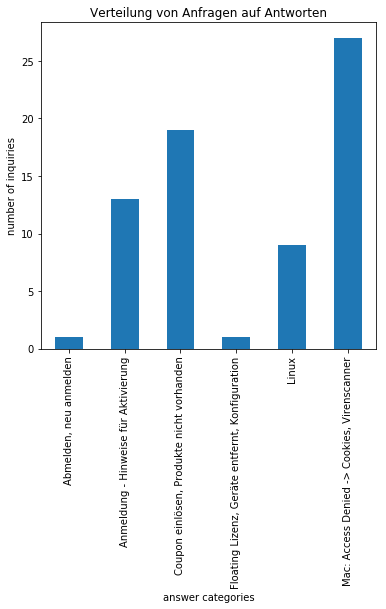

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
corpus.groupby('answer').inquiry.count().plot.bar(ylim=0)
plt.title('Verteilung von Anfragen auf Antworten')
plt.xlabel('answer categories')
plt.ylabel('number of inquiries')
plt.show()

### 4. Beispiele von guten / schlechten Nachrichten
Bei der Analyse der Daten haben wir gute und schlechte Support Anfragen gesehen. Nun zeigen wir welche Nachrichten sich anhand der _Wort Menge_ gut für NLP eignen und welche nicht.

Beispiele für **schlechte** Nachrichten:

In [10]:
word = 5
mask = (corpus['inquiry'].str.len() < 15 * word)
bad_inquiries = corpus.loc[mask].inquiry

for i, msg in enumerate(bad_inquiries[:5]):
    print('Bsp.', i, '\t', msg, '\n')

Bsp. 0 	 bitte iphone und ipad entfernen. 

Bsp. 1 	 bitte das ipad aktiviert lassen und die anderen deaktivieren. 

Bsp. 2 	 besprochen mit christian heimann 

Bsp. 3 	 entfernen der app vom i-pad 

Bsp. 4 	  i-pad 



Beispiele für **gute** Nachrichten:

In [11]:
word = 5
mask = (corpus['inquiry'].str.len() > 50 * word)
good_inquiries = corpus.loc[mask].inquiry

for i, msg in enumerate(good_inquiries[:5]):
    print('Bsp.', i, '\t', msg, '\n')

Bsp. 0 	 normenauszug 2018, rechenbuch metall, tabellenbuchs metall, fechkundebuch metall, machineworld, topdesign, automation control, konstrukteur 1, konstrukteur 2 und konstrukteur 3 funktionieren nicht mehr. es kommt die meldung „nicht mehr seiten kostenlos verfügbar“. habe alle bücher bezahlt und bis vor kurzem haben alle funktioniert. 

Bsp. 1 	 leider fehlen mir paar kapitel im lehrmittel (lm-a, d). eins davon brauche ich jetzt in der schule (heizungs- und lüftungsanlagen)ich habe die app mehrfach gelöscht und neu installiert, funktioniert trotzdem nicht. computer habe ich auch schon heruntergefahren. ich bitte sie um hilfe. ich wünsche ihnen einen schönen tag. 

Bsp. 2 	 in meinem beook funktionieren die inhalte des fr fachrechenbuches nicht mehr. es erscheint die meldung "geräteanzahl überschritten". nach meinem wissen ist dieses lizenz jedoch nur auf meinem lap top (und sonst nirgends) installiert.können sie mit das fr-buch wieder freischalten? 

Bsp. 3 	 ich wollte heute das